In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import fisher_exact
from scipy.stats import chi2_contingency
from scipy.stats import median_test
from scipy.stats import mannwhitneyu
from scipy.stats import pearsonr

In [114]:
#import data
data = pd.read_csv("house_data_2024.csv")

<h1><center>Housing Price Analysis</center></h1> 

***

## I. About the Report

The report is made for the individual assignment for USYD's unit- QBUS2810.

This report focuses on the predictive relationship between house’s price and living area size in square meters. The influence of waterfront location of the house on the house's price willl also be assessed.

***

## II. About the Dataset

The 'house_data_2024.csv' file contains data about house's price in dollar ('price'), the number of bedrooms ('bedrooms'), the number of bathrooms ('bathrooms'), living area size in square meters ('sqm_living'), lot area size in square meters ('sqm_lot'), and waterfront location ('waterfront', 0: for no waterfront (NWF), 1: for waterfront (WF)). The specific location of the houses are not given. 

***


## III. Data Cleaning

Conduct an appopriate exploratory analysis on the house priced, for all houses. Discuss any cleaning of data you did, including why and how you did it, or why you didn't do it. Explore the distribution of the houses in the two subgroups, waterfront and not. (4 marks)

In [115]:
#inspect the data
data.head()

,id,price,bedrooms,bathrooms,sqm_living,sqm_lot,waterfront
0,1,221900,3,1.00,109.624675,524.897807,0
1,2,538000,3,2.25,238.758826,672.798216,0
2,3,180000,2,1.00,71.534745,929.022668,0
3,4,604000,4,3.00,182.088443,464.511334,0
4,5,510000,3,2.00,156.075808,750.650316,0


In [116]:
#check for nulls
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21601 entries, 0 to 21600
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          21601 non-null  int64  
 1   price       21601 non-null  int64  
 2   bedrooms    21601 non-null  int64  
 3   bathrooms   21601 non-null  float64
 4   sqm_living  21601 non-null  float64
 5   sqm_lot     21601 non-null  float64
 6   waterfront  21601 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 1.2 MB


In [117]:
data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqm_living', 'sqm_lot',
       'waterfront'],
      dtype='object')

In [118]:
data.describe().round(2)

,id,price,bedrooms,bathrooms,sqm_living,sqm_lot,waterfront
count,21601.00,21601.00,21601.00,21601.00,21601.00,21601.00,21601.00
mean,10800.46,544686.84,3.38,2.12,197.85,1408.65,0.01
std,6235.39,769898.28,1.14,1.01,684.42,3907.06,0.11
min,1.00,75000.00,0.00,0.00,26.94,48.31,0.00
25%,5401.00,321500.00,3.00,1.75,132.85,468.23,0.00
50%,10800.00,450000.00,3.00,2.25,177.44,707.92,0.00
75%,16200.00,645000.00,4.00,2.50,236.90,993.68,0.00
max,21600.00,99999999.00,99.00,99.00,99999.00,153414.99,9.00


There are no null in the dataset. The dataset has 7 columns with a total of 21601 inputs.

In [119]:
#check for duplicate data
dup = data.duplicated(subset='id') 
dup[dup == True]

9999    True
dtype: bool

Based on the dataset summary, the dataset seems to have error inputs as the maximum value of the columns is unreasonably high. The house 'id' 9999 is also being duplicated.

In [120]:
data[data['id'] == 9999]

,id,price,bedrooms,bathrooms,sqm_living,sqm_lot,waterfront
9998,9999,640000,3,1.75,156.075808,752.508361,0
9999,9999,99999999,99,99.00,99999.000000,99999.000000,9


For the row that has an index of 9999, all the inputs are shown to be an error (the numbers are unreasonable and do not match the data set, i.e. waterfront is 9) which affects the distribution and analysis of the data set 'house_data_2024.csv'. Hence, this row (index 9999) will be removed.

In [121]:
#remove the row from the data set
data = data.drop([9999]) 

In [122]:
data.describe().round(2)

,id,price,bedrooms,bathrooms,sqm_living,sqm_lot,waterfront
count,21600.00,21600.00,21600.00,21600.00,21600.00,21600.00,21600.00
mean,10800.50,540082.43,3.37,2.11,193.23,1404.08,0.01
std,6235.53,367144.54,0.93,0.77,85.32,3849.13,0.09
min,1.00,75000.00,0.00,0.00,26.94,48.31,0.00
25%,5400.75,321500.00,3.00,1.75,132.78,468.23,0.00
50%,10800.50,450000.00,3.00,2.25,177.44,707.92,0.00
75%,16200.25,645000.00,4.00,2.50,236.90,993.61,0.00
max,21600.00,7700000.00,33.00,8.00,1257.90,153414.99,1.00


The minimum value of 'waterfront' is 0 and maximum is 1 so there are no error inputs in this column.

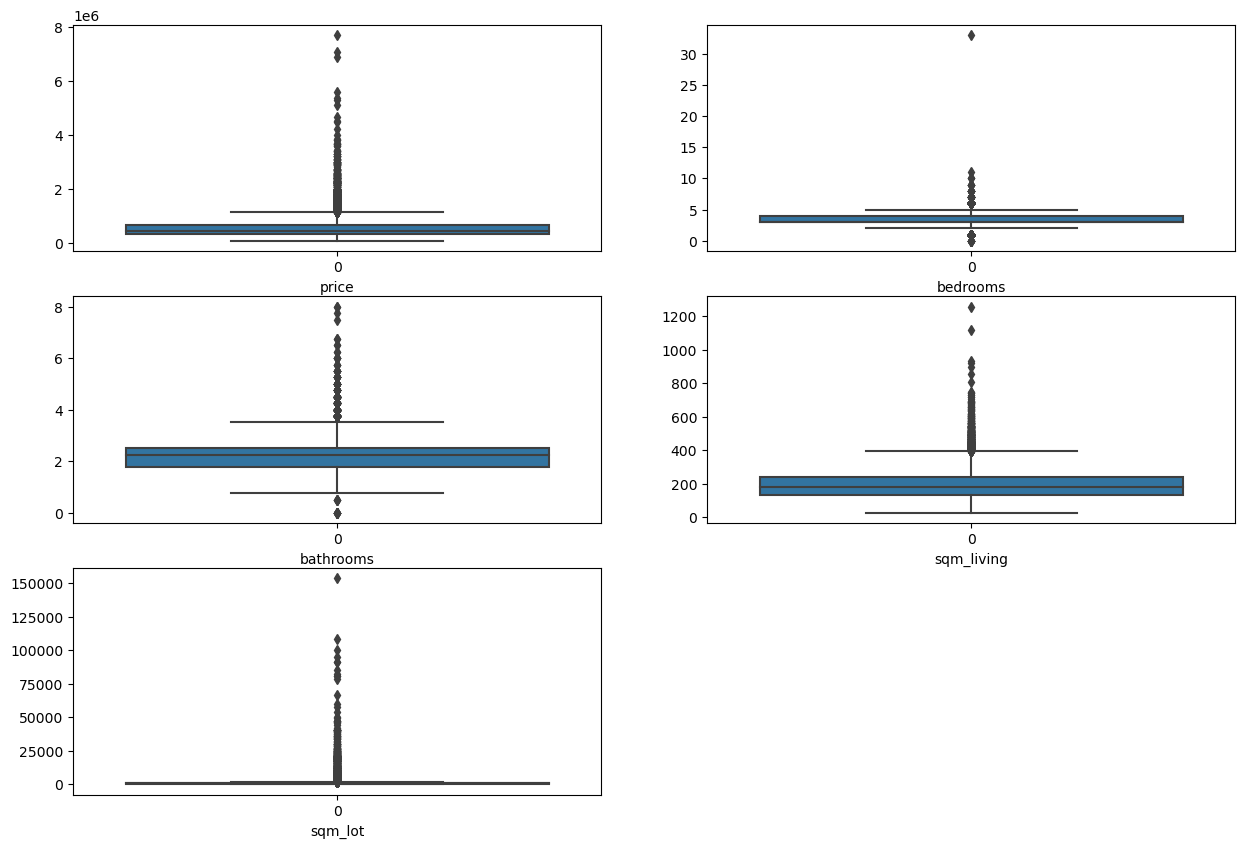

In [123]:
var = ['price', 'bedrooms', 'bathrooms', 'sqm_living', 'sqm_lot']
fig = plt.figure(figsize=(15,10))
for i in range(len(var)):
    ax = fig.add_subplot(3,2,i+1)
    plt.xlabel(var[i])
    sns.boxplot(data[var[i]])

There are a lot of outliers in all the variables. Considering the purpose of this report and to keep a large number of sample, I won't remove these outliers. 

***

## IV. Exploratory Data Analysis (EDA)

I will focus on exploring the variables related to the purpose of the report (price, sqm_living, and waterfront).

<Axes: xlabel='price', ylabel='Count'>

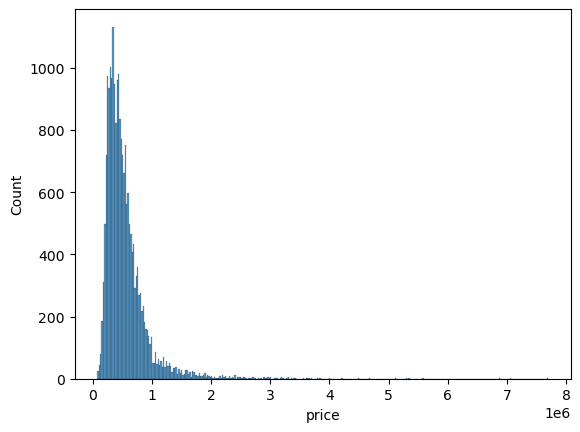

In [125]:
sns.histplot(data,x='price')

<Axes: ylabel='price'>

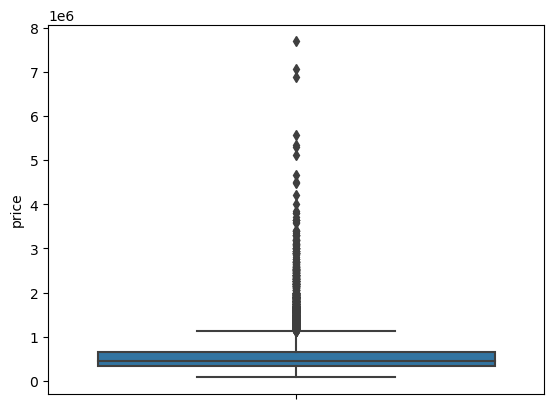

In [126]:
sns.boxplot(data, y = 'price')

House price is a right, or positively, skewed variable. The price range is between \\$75000 and \\$7700000, with a median of \\$540082.43, and the standard deviation is \\$367144.54. 50% of house price is larger than \\$450000 and 25% is greater than \\$645000. There are outliers in the long right tail of the distribution, above about \$1,200,000 of the house price.

In [127]:
data.groupby('waterfront')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
waterfront,,,,,,,,
0,21437.0,5.315527e+05,3.416021e+05,75000.0,320000.0,450000.0,639900.0,7700000.0
1,163.0,1.661876e+06,1.120372e+06,285000.0,760000.0,1400000.0,2215000.0,7062500.0


<Axes: xlabel='waterfront', ylabel='price'>

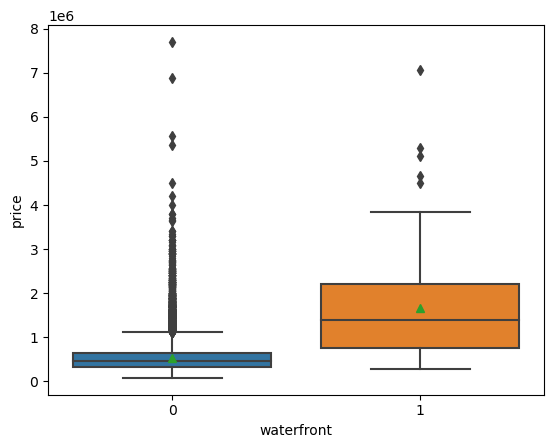

In [128]:
sns.boxplot(data=data, y = "price", x = "waterfront", showmeans=True)
#0 is NWF and 1 is WF

In [129]:
WF = data.loc[data['waterfront']==1, 'price']
NWF = data.loc[data['waterfront']==0, 'price']

In [130]:
stats.describe(WF)

DescribeResult(nobs=163, minmax=(285000, 7062500), mean=1661876.0245398772, variance=1255232816099.802, skewness=1.4427023109648562, kurtosis=3.127041653743727)

In [131]:
stats.describe(NWF)

DescribeResult(nobs=21437, minmax=(75000, 7700000), mean=531552.6743480897, variance=116691993510.25652, skewness=3.655964715365697, kurtosis=31.39380697105507)

Text(0.5, 1.0, 'Waterfront house prices')

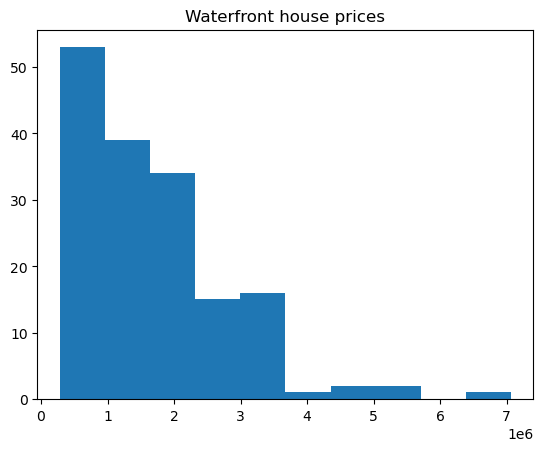

In [132]:
plt.hist(WF)
plt.title('Waterfront house prices')

Text(0.5, 1.0, 'No waterfront house prices')

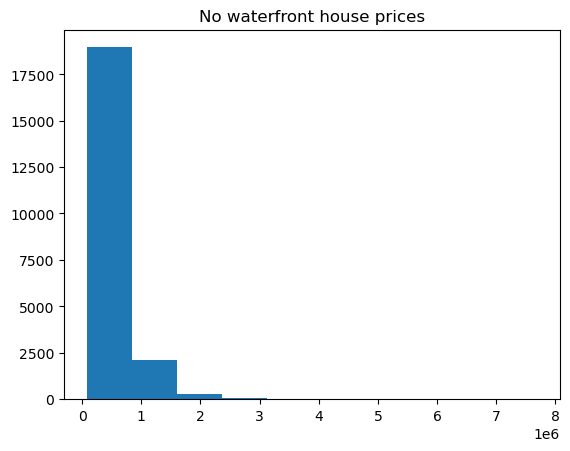

In [133]:
plt.hist(NWF)
plt.title('No waterfront house prices')

From exploring the distribution of the two subgroups, waterfront and not, the subgroup waterfront has a higher mean than the subgroup with no waterfront (531552.67 < 1661876.02). However, the no waterfront subgroup has a lower standard deviation compared to the waterfront subgroup (341602.10 <  1120371.73), this means that the houses prices in the waterfront subgroup varied more than the no waterfront subgroup. The group also has a much higher count (or data) than the waterfront subgroup (21,437 > 163). Moreover, the no waterfront subgroup has a higher skewness (3.6560) than the waterfront subgroup (1.4427). Based on the kurtosis of two subgroups, the waterfront subgroup has a kurtosis (kurtosis = 3.1270) close to a normal distribution (which is 3), whereas the no waterfront subgroup has a high kurtosis (31.3938), indicating a heavy tail and more outliers (can be seen in the boxplot).

***

## V. Linear relationship between house price and living area size

By conducting an appropriate analysis, a linear relationship between houses' prices and living area size will be assessed. 

**1. Assess whether the linear relationship exists**

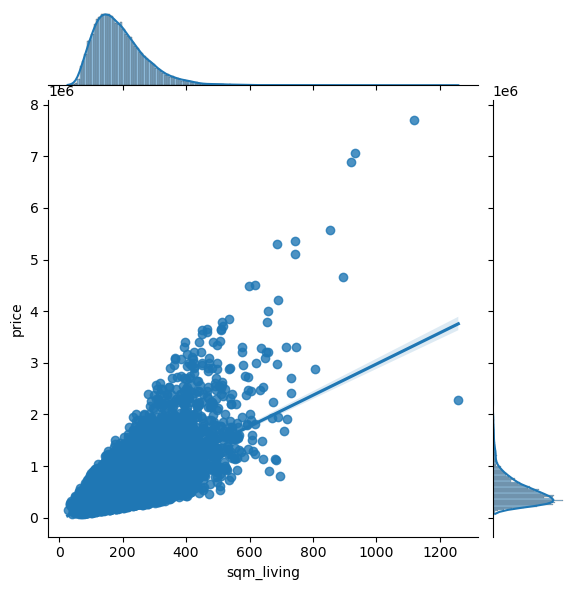

In [134]:
sns.jointplot(x = data['sqm_living'], y = data['price'], kind = 'reg')

In [135]:
pearsonr(data['sqm_living'], data['price'])

PearsonRResult(statistic=0.7019147304943023, pvalue=0.0)

The two variables, sqm_living and price, have a correlation of 0.7019. With a large sample size (n = 21600), the high correlation of 0.7019 is highly significantly different to 0 (p-value ≈ 0). This suggests a **strong positive linear relationship** between the living area size in square metres and houses' prices. This means that the larger the living area size in square metres, the higher the houses' prices. However, correlation does not mean causation so it is not certain whether the living area size causes the price to change.

Text(0, 0.5, "Houses' prices ($)")

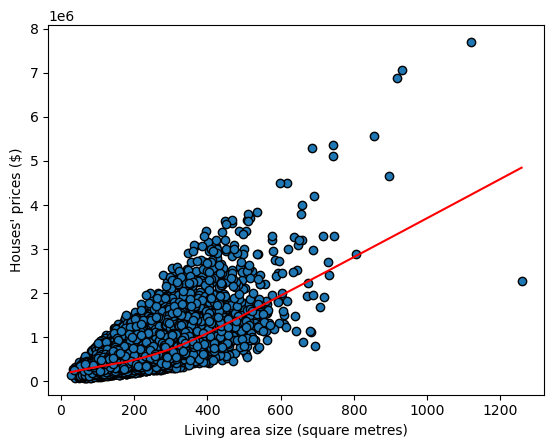

In [136]:
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
plt.scatter(data['sqm_living'],data['price'], edgecolor = 'black')
z1 = lowess(data['price'], data['sqm_living'], frac=1./5)
plt.plot(z1[:,0],z1[:,1],'red')
import matplotlib.pyplot as plt
plt.xlabel ("Living area size (square metres)")
plt.ylabel ("Houses' prices ($)")

The linear model is appropriate as the 'lowess' locally-smoothed regression curve fit through the data suggests linearity from living area size in square metres $\approx 300$. From living area size in square metres = 0 to living area size in square metres $\approx 300$, there's a slight curve, but overall, the red line (locally-smoothed regression curve) suggests a linear relationship between the living area size in square metres and the houses' prices.

In conclusion, both the correlation and the locally-smoothed regression curve, suggest that there is a linear relationship between the living area size in square metres and the houses' price.

**2. Simple linear regression analysis (OLS and LAD)**

$H_0: \beta_1 = 0$ 

(there's no significant effect from the living area size in square metres to houses' prices)

$H_1: \beta_1 \neq 0$ 

(there's a significant effect from the living area size in square metres to houses' prices)

using $\alpha = 0.05$

**(a) Ordinary Least Squares (OLS)**

The dependent variable (y) is the price and the independent variable (x) is the living area size in square metres.

In [137]:
import statsmodels.formula.api as smf

ols = smf.ols(formula = 'price ~ sqm_living', data = data[['sqm_living','price']]).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.098e+04
Date:                Thu, 25 Jul 2024   Prob (F-statistic):               0.00
Time:                        21:52:46   Log-Likelihood:            -3.0009e+05
No. Observations:               21600   AIC:                         6.002e+05
Df Residuals:                   21598   BIC:                         6.002e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.355e+04   4405.201     -9.887      0.000   -5.22e+04   -3.49e+04
sqm_living  3020.3863     20.855    144.828      0.000    2979.509    3061.264
==============================================================================
Omnibus:                    14824.811   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546032.506
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.975   Cond. No.                         523.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Using $\alpha = 0.5$, the t-stat $= \frac{\hat{\beta_1}}{SE (\hat{\beta_1})} = \frac{3020.3863}{20.855} = 144.828$ with 21598 degrees of freedom. The p-value for this two-tailed test is $2 \times P(t_{21598} > 144.828) = 0.000$. For $ \alpha = 0.05$, p-value < 0.05 (0 < 0.05), we reject the null hypothesis and conclude that there is a significant effect from the living area size in square metres to houses' prices.

The OLS model of this sample is: $\widehat{\text{price}} = 3020.3863 \times \text{sqm_living} - 43550$. 

With $\hat{\beta_0} = -43550$, and $\hat{\beta_1} = 3020.3863$.

The R-squared of the OLS model is 0.493, meaning that around 49.3% of the variability observed in the houses' prices is explained by the living area size in square metres in the OLS regression model. So the other 50.7% of the variation is explained by other factors which is not included in the OLS model. While the OLS regression model suggests that living area size (in square metres) is a significant predictor of houses' prices, there are likely other factors influencing house prices that are not captured by the model (for example, waterfront).

OLS assumpitons:
1. Linearity: $Y = \beta_0 + \beta_1X + \epsilon$ is the true population linear model
2. Exogeneity: $E(\epsilon|X) = 0$
3. Independence: The data pairs $Y_i, X_i$ are i.i.d.
4. 4th moment exists: $E(Y^4), E(X^4)$ exist, i.e. are finite $ < \infty$ 
5. Constant error variance (homoscedasticity): $Var(\epsilon|X) = \sigma^2$

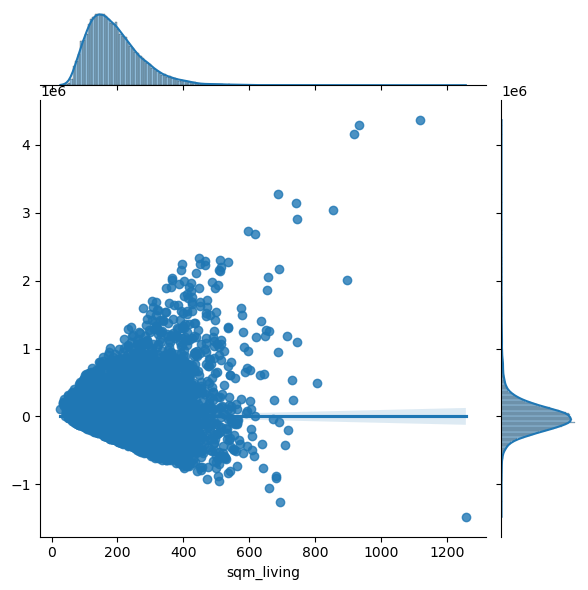

In [138]:
sns.jointplot(x = data['sqm_living'], y = ols.resid, kind ='reg')

In [139]:
pearsonr(data['sqm_living'], ols.resid)

PearsonRResult(statistic=-1.078998002057574e-15, pvalue=0.9999999999998601)

In [140]:
ols.resid.mean().round(2)

-0.0

Assessing the assumptions:
1. As discussed in the hypothesis test ($H_0: \beta_1 = 0; H_1: \beta_1 \neq 0)$, this assumption is valid. 

2. Based on the residual graph and the correlation between the residual and the living area size, the correlation is $\approx 0$, and there are no clear trends (a straight line at 0). Moreover, the mean of the residual is $\approx 0$. Hence, this assumption can be considered to be valid.

3. This assumption can be assumed to be valid (as discussed about the houses' prices in question 2- the prices of the houses do not influence each other too much) for both living area size in square metres and houses' prices.

4. Looking at the box plot for the living area size and houses' prices, there are a lot of outliers (especially for the houses' prices variable). Moreover, the houses' prices are not bounded in any finite interval. Therefore, this assumption does not seem to be satisfied. 

5. The residual graph has a funnel shape which indicates that the variance of the errors is not constant. The variance increases as the living area size increases. Thus, this assumption is not valid. 

In summary, for the OLS regression model, only the first three assumptions are considered valid. The violation of the 4th and 5th assumptions may impact the reliability of the OLS regression therefore, I don't think the OLS model will provide a strong spillover effect from the living area size in square metres to the houses' prices.

We can refit the OLS model using heteroskedasticity-robust SEs. The SEs are larger than the OLS model aboved and this model assumed only assumptions 1 to 4, allowing a non-constant variance.

In [141]:
ols_robust = smf.ols(formula = 'price ~ sqm_living', data = data[['sqm_living','price']]).fit(cov_type = 'HC0')
ols_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     2466.
Date:                Thu, 25 Jul 2024   Prob (F-statistic):               0.00
Time:                        21:52:47   Log-Likelihood:            -3.0009e+05
No. Observations:               21600   AIC:                         6.002e+05
Df Residuals:                   21598   BIC:                         6.002e+05
Df Model:                           1                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.355e+04   1.08e+04     -4.031      0.000   -6.47e+04   -2.24e+04
sqm_living  3020.3863     60.825     49.657      0.000    2901.172    3139.601
==============================================================================
Omnibus:                    14824.811   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546032.506
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.975   Cond. No.                         523.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

Using $\alpha = 0.5$, the t-stat $= \frac{\hat{\beta_1}}{SE (\hat{\beta_1})} = \frac{3020.3863}{60.825} = 49.657$ with 21598 degrees of freedom. The p-value for this two-tailed test is $2 \times P(t_{21598} > 49.657) = 0.000$. For $ \alpha = 0.05$, p-value < 0.05 (0 < 0.05), we reject the null hypothesis and conclude that there is a significant effect from the living area size in square metres to houses' prices.

The model for this regression is similar to the previous: $\widehat{\text{price}} = 3020.3863 \times \text{sqm_living} - 43550$. 

With $\hat{\beta_0} = -43550$, and $\hat{\beta_1} = 3020.3863$.

Both tests reject the null hypothesis but still they both don't satisfy the 4th assumption (4th moment exists: $E(Y^4), E(X^4)$ exist, i.e. are finite $ < \infty$). 

**(b) Least Absolute Deviation (LAD)**

In [142]:
lad = smf.quantreg('price ~ sqm_living', data =data[['sqm_living','price']]).fit()
lad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                  price   Pseudo R-squared:               0.2480
Model:                       QuantReg   Bandwidth:                   3.152e+04
Method:                 Least Squares   Sparsity:                    4.836e+05
Date:                Thu, 25 Jul 2024   No. Observations:                21600
Time:                        21:52:48   Df Residuals:                    21598
                                        Df Model:                            1
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.283e+04   4072.816     12.972      0.000    4.49e+04    6.08e+04
sqm_living  2332.2000     19.281    120.956      0.000    2294.407    2369.993
==============================================================================
"""

Using $\alpha = 0.5$, the t-stat $= \frac{\hat{\beta_1}}{SE (\hat{\beta_1})} = \frac{2332.2000}{19.281} = 120.956$ with 21598 degrees of freedom. The p-value for this two-tailed test is $2 \times P(t_{21598} > 120.956) = 0.000$. For $ \alpha = 0.05$, p-value < 0.05 (0 < 0.05), we reject the null hypothesis and conclude that there is a significant effect from the living area size in square metres to houses' prices.

The LAD model of this sample is: $\widehat{\text{price}} = 2332.2000 \times \text{sqm_living} + 52830$. 

With $\hat{\beta_0} = 52830$, and $\hat{\beta_1} = 2332.2000$.

LAD assumptions:

1. Linearity: $Y = \beta_0 + \beta_1X + \epsilon$ is the true population linear model
2. The median of $(\epsilon|X) = 0$
3. Independence: The data pairs $Y_i, X_i$ are i.i.d.
4. Continuity of density: $p(Y_i|X_i)$ is a continuous function
5. 1st absolute moment of Y exists: $E(|Y|) < \infty$
6. 2nd moment of X exists: $E(X^2)< \infty$

In [143]:
lad.resid.median()

1.6589183360338211e-09

In [144]:
stats.describe(data['price'])

DescribeResult(nobs=21600, minmax=(75000, 7700000), mean=540082.4292592593, variance=134795109808.4706, skewness=4.024719119466403, kurtosis=34.59035294122284)

Text(0, 0.5, 'Residual')

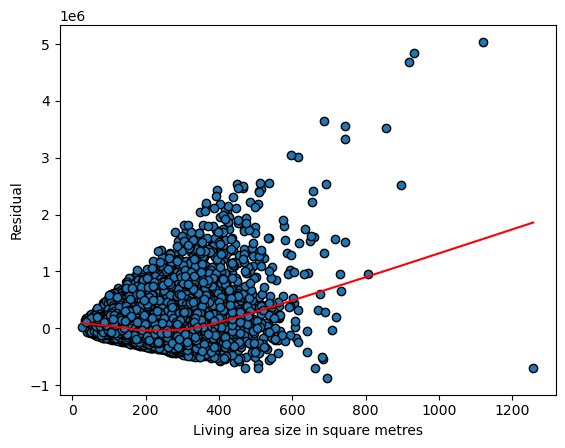

In [145]:
lowess = sm.nonparametric.lowess
plt.scatter(data['sqm_living'],lad.resid, edgecolor = 'black')
z1 = lowess(lad.resid, data['sqm_living'], frac=1./5)
plt.plot(z1[:,0],z1[:,1],'red')
plt.xlabel("Living area size in square metres")
plt.ylabel("Residual")

In [146]:
stats.describe(data['sqm_living'])

DescribeResult(nobs=21600, minmax=(26.94165738, 1257.896693), mean=193.23197523963287, variance=7279.773421000302, skewness=1.47159695787783, kurtosis=5.245037429319202)

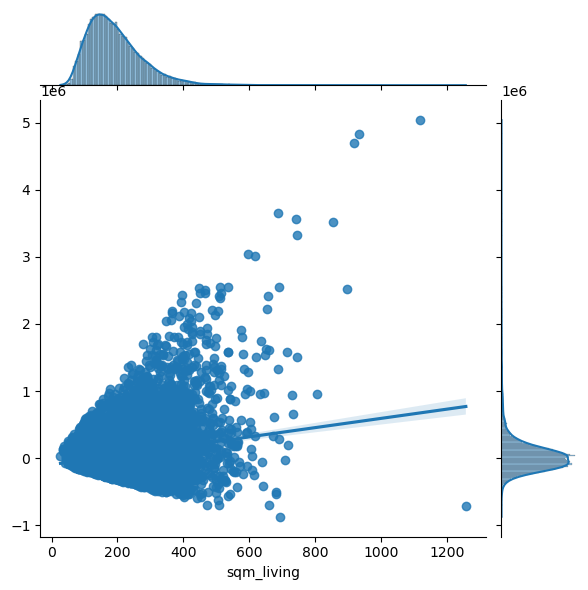

In [147]:
sns.jointplot(x = data['sqm_living'], y = lad.resid, kind ='reg')

Assessing the assumptions:

1. This is valid as shown in the question 4.

2. The median of the residual is $4.598405212163925 \times 10^{-9} \approx 0$. Hence this assumption is considered to be valid as well.

3. As discussed in the OLS assumptions, this assumption is satisfied.

4. We do not know p(Y|X). However the 'lowess' locally-smoothed regression curve between the x variable (living area size in square metres) and the residual ($Y_i - \hat{Y}_i$) does not have any drastic fluctuation or sudden shifts, hence this assumption is likely satisfied.

5. As mentioned in the OLS assumption, the houses' prices are not bounded by any finite value which significant impact the expected value of |Y|. The sample data set also shows significant number of outliers. Hence, this assumption is not likely to be valid. 

6. The sample's living area size in square metres has a variance of 7279.7734. Even though this is not the population variance, however, it's unlikely that the variance (or 2nd moment) of X will be infinite. So this can be assumed to be valid.

Overall, most of the assumptions are considered to be valid except assumption 5.

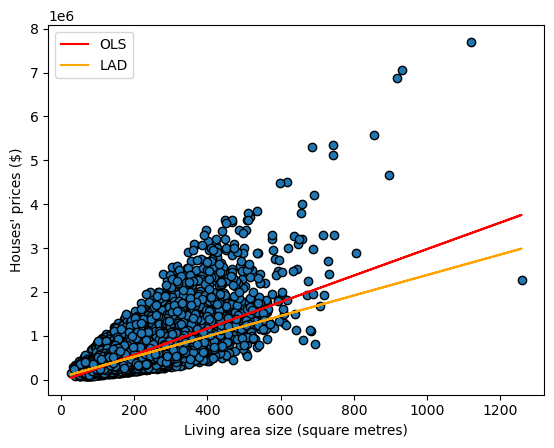

In [148]:
plt. plot(data['sqm_living'], ols.fittedvalues, color = 'red', label ='OLS')
plt. plot(data['sqm_living'], lad.fittedvalues, color = 'orange', label = 'LAD')
plt.scatter(x=data['sqm_living'], y = data['price'], edgecolors = 'black')
plt.xlabel ('Living area size (square metres)')
plt.ylabel ("Houses' prices ($)")
plt.legend(loc='upper left')

**(c) Conclusion**

As mentioned above, the 'price' variable has many outliers which make violates OLS's assumptions. Therefore, I will use LAD to present the linear relationship between the houses' prices and living area size as LAD is more robust to outliers. 

<center>$\widehat{\text{price}} = 2332.20 \times \text{sqm_living} + 52830$</center>

This indicates that when the living area size increases by one square meter, the price of the house increases by \\$2332.20. However, it's crucial to note that the $R^2$ of the LAD is only 24.8%, therefore this linear regression won't provide an accurate prediction of the house price. 

***

## VI. Assess whether waterfront house prices are typically higher

In this part, I will use three different statistical tests (t-test, median test, and Mann-Whitney test) to assess whether waterfront house prices are significantly higher than no waterfront house. The assumptions of these test will be assessed to choose the test with the best reliability (in case the result of these tests are different from each other).

Annotation:

WF: waterfront house prices

NWF: no waterfront house prices

**1. One tail t-test**

Hypotheses:

$H_0:$ $\mu_{\text{WF}} = \mu_{\text{NWF}}$ (the two subgroup means are equal)

$H_1:$ $\mu_{\text{WF}} > \mu_{\text{NWF}}$ (the WF subgroup has a higher mean than the NWF subgroup)

With $\alpha=0.05$.  

In [149]:
stats.ttest_ind(WF,NWF, equal_var = False, alternative='greater')

TtestResult(statistic=12.875998525086034, pvalue=6.890091959494136e-27, df=162.22910664622552)

The test statistics, assuming separate variances, is 12.876, which has 162.229 degrees of freedom. The p-value of the one-tailed t-test is $P(t > 12.876) = 6.89 \times 10^{-27} \approx 0$. This p-value is $< 0.05$ therefore we can **reject the null hypothesis** and conclude that there is a strong evidence to suggest that the mean of the waterfront house prices subgroup is greater than the man of no waterfront house prices subgroup at the 0.05 significance level.

Assumptions for t-test:

1. Each group's sample is i.i.d.

2. The two groups are independent of each other

3. $E(Y_{i}^4) < \infty$ in each group

Assessing the assumptions:
1. This depends on the price of the houses independently of each other which can be assumed to be true but we can't know for sure as the house can be priced based on competition (setting lower price or higher price than the other houses to attract buyers).

2. This assumes that the houses that have waterfront do not influence the houses that do not have a waterfront (and vice versa). It can be assumed to be true as whether the house has waterfront or not depends on the location of the house.

3. The price variable is highly skewed so this can't be assumed.


**2. Median test**

$H_0:$ $median_{\text{WF}} = median_{\text{NWF}}$ (the two subgroup medians are equal)

$H_1:$ $median_{\text{WF}} \neq median_{\text{NWF}}$ (the two subgroup medians are not equal)

With $\alpha=0.05$.  

In [150]:
median_test(WF, NWF, ties = "ignore")

MedianTestResult(statistic=120.40549039211706, pvalue=5.156582160773728e-28, median=450000.0, table=array([[  152, 10591],
       [   11, 10674]]))

The test statistic is 120.405. The p-value is $5.157 \times 10^{-28}$. This p-value is $\approx 0$, and $< 0.05$, thus we **reject the null hypothesis** and conclude that there is a significant difference between the median of the house prices of the WF subgroup and the house prices of the NWF subgroup.

Assumptions:

1. The data are i.i.d. in each group

2. The two groups are independent of each other 

3. The data are at least on the ordinal scale

4. The assumptions of Pearson's or Fisher's test hold- each cell in the contigency table has expected value at least 5

Assessing the assumptions:

Both assumptions 1 and 2 are similar to the t-test.

3. This is true as the prices of the houses are continuous (quantitative) data.

4. The test output gives the cell count: $[152,10591]$ and $[11,10674]$. In group WF, 152 observations are below the overall median ($450000$) and 10591 are above. For group NWF, 11 observations are below the overall mean and 10674 are above. Since $n_1$ = 163 and $n_2$ = 21437 and N = 21600, we expect $0.5 x n_1 = 81.5$ observations in the WF group, and $0.5 x n_2 = 10718.5$ observations in the NWF group to be above the overall median. Hence, the 4th assumption is satisfied.

In [151]:
row = ['< median', '(exp.)', '> median', '(exp.)']
col = ['WF','NWF']
pd.DataFrame([[152,11],
              ['81.5','10718.5'],
              [10591,10674],
              ['81.5','10718.5']],index=row, columns=col)

,WF,NWF
< median,152,11
(exp.),81.5,10718.5
> median,10591,10674
(exp.),81.5,10718.5


**3. Mann-Whitney test**

$H_0: P(WF > NWF) = 0.5$ 

(The distribution of the WF subgroup is equal to the distribution of the NWF subgroup)

$H_1: P(WF> NWF) > 0.5$ 

(The distribution of WF subgroup is greater than the distribution of NWF subgroup)

With $\alpha=0.05$.  

In [152]:
mannwhitneyu(WF,NWF, alternative='greater')

MannwhitneyuResult(statistic=3088961.0, pvalue=1.6214734345185487e-64)

The test statistic is $U = 3088961$, with a p-value of $1.621 \times 10^{-64}$ which is $\approx 0$. The p-value is $< 0.05$ (the significance level), hence we can **reject the null hypothesis**. We conclude that there is a significant difference in the distribution of the houses' prices between the two subgroups (WF and NWF).

Assumptions:
    
1. The data are i.i.d. in each group

2. The two groups are independent of each other

3. The data are at least on the ordinal scale

Assessing the assumptions:

All three assumptions are proven to be valid in part (a) and (b). Similarly, if the house prices do not influence each other too significantly then all assumptions are satisfied.

**4. Assessing which test statistics is the most reliable**

Both the median test and Mann-Whitney test have marginally lower power compared to the t-test only when the t-test assumptions are satisfied. However, when assessing the assumptions of the t-test, the thrid assumptions is not valid. Therefore, I will trust in the Mann-Whitney test as it has more power than median test.

**5. Conclusion**

From the exploratory analysis of the house prices in two subgroups, waterfront and no waterfront, the waterfront subgroup has a higher mean and a higher standard deviation than the no waterfront subgroup. However, the no waterfront subgroup has significantly more outliers than the waterfront group (higher kurtosis). 

To assess whether waterfront house prices are typically higher than no waterfront house prices, three statistical tests (t-test, median test and Mann-Whitney test) are conducted. Even though I believe in the Mann-Whitney test result the most (after assessing all the assumptions), all three tests reject the null hypothesis which suggests that waterfront house prices are typically higher than no waterfront house prices with a 0.05 significance level. 

***

## VII. Summary

This report focuses on the predictive relationship between house’s price and living area size in square meters. The influence of waterfront location of the house on the house's price willl also be assessed.

The analysis has answer two main points: 
- Is there a linear relationship between price and sqm_living?
- Does houses with waterfront location typically have higher price?

After analysing the variables 'price' and 'sqm_livng', it is concluded that there's a linear relationship between these two variables, but the 'sqm_living' alone won't provide an accurate prediction of the 'price'. The prediction can be improved by incorporating more predictors (for example: bedrooms, sqm_lot). For the second point, at 0.05 significance level, it has been proven that waterfront houses have a significant higher price than houses that don't have a waterfront. 